In [62]:
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import classification_report

In [63]:
from google.colab import files
uploaded=files.upload()

Saving Zoo.csv to Zoo (1).csv


In [64]:
Data=pd.read_csv('Zoo.csv')
Data

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


In [65]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  type         101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB


In [66]:
Data.isnull().sum()

animal name    0
hair           0
feathers       0
eggs           0
milk           0
airborne       0
aquatic        0
predator       0
toothed        0
backbone       0
breathes       0
venomous       0
fins           0
legs           0
tail           0
domestic       0
catsize        0
type           0
dtype: int64

In [67]:
Data.head()

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [68]:
Data=Data.drop(columns=['animal name'])
Data

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


In [69]:
Data.columns.unique()

Index(['hair', 'feathers', 'eggs', 'milk', 'airborne', 'aquatic', 'predator',
       'toothed', 'backbone', 'breathes', 'venomous', 'fins', 'legs', 'tail',
       'domestic', 'catsize', 'type'],
      dtype='object')

In [70]:
Data.corr()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
hair,1.000000,-0.427851,-0.817382,0.878503,-0.198431,-0.473554,-0.154769,0.492531,0.191681,0.441149,-0.104245,-0.280313,0.394009,0.048973,0.207208,0.455020,-0.562384
feathers,-0.427851,1.000000,0.419248,-0.410761,0.656553,-0.058552,-0.104430,-0.613631,0.231403,0.254588,-0.145739,-0.223541,-0.206686,0.292569,0.031586,-0.135934,-0.197520
eggs,-0.817382,0.419248,1.000000,-0.938848,0.376646,0.376244,0.011605,-0.642150,-0.340420,-0.382777,0.098689,0.164796,-0.224918,-0.221090,-0.155610,-0.514650,0.661825
milk,0.878503,-0.410761,-0.938848,1.000000,-0.366765,-0.362613,-0.029721,0.628168,0.384958,0.423527,-0.242449,-0.156328,0.214196,0.210026,0.163928,0.574906,-0.723683
airborne,-0.198431,0.656553,0.376646,-0.366765,1.000000,-0.172638,-0.295181,-0.594311,-0.104718,0.286039,0.008528,-0.251157,0.043712,0.009482,0.063274,-0.349768,0.022677
aquatic,-0.473554,-0.058552,0.376244,-0.362613,-0.172638,1.000000,0.375978,0.053150,0.022463,-0.637506,0.087915,0.604492,-0.360638,-0.034642,-0.224308,-0.111866,0.326639
predator,-0.154769,-0.104430,0.011605,-0.029721,-0.295181,0.375978,1.000000,0.129452,0.051022,-0.262931,0.115391,0.190302,-0.099723,0.018947,-0.309794,0.144790,0.061179
toothed,0.492531,-0.613631,-0.642150,0.628168,-0.594311,0.053150,0.129452,1.000000,0.575085,-0.065690,-0.062344,0.364292,-0.193476,0.310368,0.069430,0.344010,-0.471527
backbone,0.191681,0.231403,-0.340420,0.384958,-0.104718,0.022463,0.051022,0.575085,1.000000,0.207666,-0.246611,0.209499,-0.432856,0.731762,0.101733,0.356976,-0.828845
breathes,0.441149,0.254588,-0.382777,0.423527,0.286039,-0.637506,-0.262931,-0.065690,0.207666,1.000000,-0.120752,-0.617219,0.369868,0.088952,0.124068,0.204125,-0.519308


In [71]:
len(Data)

101

In [72]:
Data.type.value_counts()

1    41
2    20
4    13
7    10
6     8
3     5
5     4
Name: type, dtype: int64

In [73]:
Data.shape

(101, 17)

<Axes: ylabel='Density'>

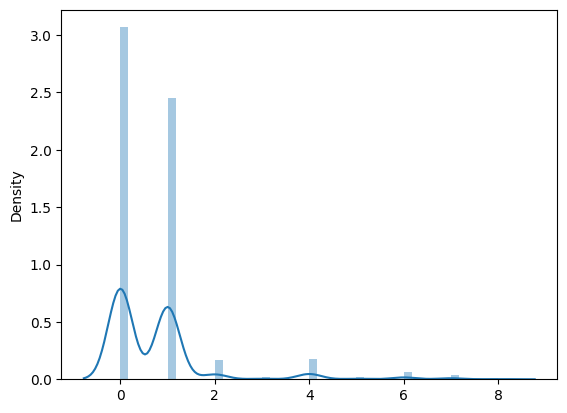

In [74]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.distplot(Data)

<Axes: ylabel='Count'>

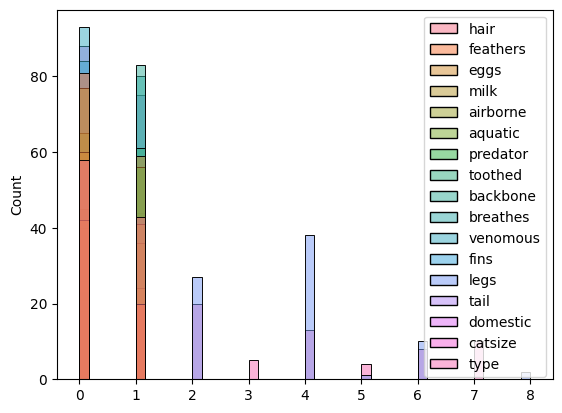

In [75]:
sns.histplot(Data)

<Axes: >

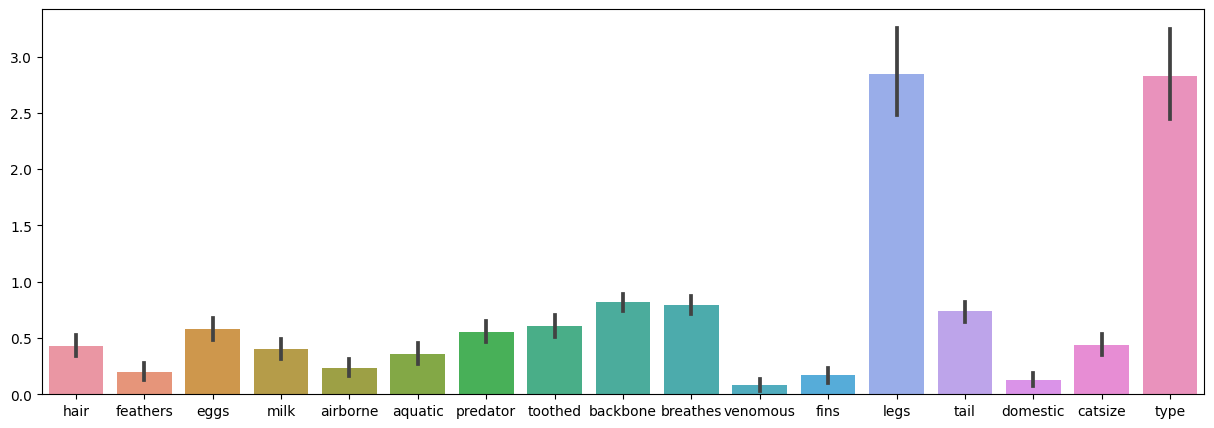

In [76]:
plt.figure(figsize=(15,5))
sns.barplot(Data)

In [77]:
x=Data.iloc[:,:16]
y=Data.iloc[:,16]
Data

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


In [78]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=11)

In [79]:
scaler=StandardScaler()
x_train_scaled=scaler.fit_transform(x_train)
x_test_scaled=scaler.transform(x_test)

In [80]:
x_train_scaled.shape

(70, 16)

In [81]:
x_train_scaled

array([[ 1.18903032, -0.43178777,  0.84102145, ..., -1.58113883,
        -0.33333333, -1.        ],
       [-0.84102145, -0.43178777,  0.84102145, ...,  0.63245553,
        -0.33333333,  1.        ],
       [-0.84102145, -0.43178777,  0.84102145, ..., -1.58113883,
        -0.33333333, -1.        ],
       ...,
       [-0.84102145, -0.43178777,  0.84102145, ...,  0.63245553,
        -0.33333333, -1.        ],
       [ 1.18903032, -0.43178777,  0.84102145, ...,  0.63245553,
        -0.33333333,  1.        ],
       [-0.84102145, -0.43178777,  0.84102145, ..., -1.58113883,
        -0.33333333, -1.        ]])

In [82]:
x_test_scaled

array([[ 1.18903032, -0.43178777, -1.18903032,  1.22474487, -0.5       ,
        -0.84102145,  0.8660254 ,  0.79240582,  0.5       ,  0.58834841,
        -0.30618622, -0.5       ,  0.54182117,  0.63245553, -0.33333333,
         1.        ],
       [ 1.18903032, -0.43178777, -1.18903032,  1.22474487, -0.5       ,
        -0.84102145,  0.8660254 ,  0.79240582,  0.5       ,  0.58834841,
        -0.30618622, -0.5       ,  0.54182117,  0.63245553, -0.33333333,
        -1.        ],
       [ 1.18903032, -0.43178777, -1.18903032,  1.22474487, -0.5       ,
        -0.84102145, -1.15470054,  0.79240582,  0.5       ,  0.58834841,
        -0.30618622, -0.5       ,  0.54182117,  0.63245553, -0.33333333,
         1.        ],
       [-0.84102145,  2.31595258,  0.84102145, -0.81649658,  2.        ,
        -0.84102145, -1.15470054, -1.26197963,  0.5       ,  0.58834841,
        -0.30618622, -0.5       , -0.39465987,  0.63245553, -0.33333333,
        -1.        ],
       [-0.84102145, -0.43178777,  0

In [83]:
x_test_scaled.shape

(31, 16)

In [84]:
y_train.shape

(70,)

In [85]:
y_test.shape

(31,)

#MODEL

In [86]:
model=KNeighborsClassifier(n_neighbors=6)
model.fit(x_train_scaled,y_train)

KNeighborsClassifier(n_neighbors=6)

In [87]:
predict=model.predict(x_test_scaled)

In [88]:
predict

array([1, 1, 1, 2, 6, 2, 7, 1, 6, 3, 2, 2, 1, 1, 2, 6, 1, 1, 4, 1, 2, 1,
       2, 3, 2, 4, 4, 2, 1, 1, 1])

In [89]:
report=classification_report(y_test,predict)

In [90]:
print(report)

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00         9
           3       0.50      1.00      0.67         1
           4       1.00      1.00      1.00         3
           5       0.00      0.00      0.00         1
           6       1.00      1.00      1.00         3
           7       1.00      1.00      1.00         1

    accuracy                           0.97        31
   macro avg       0.79      0.86      0.81        31
weighted avg       0.95      0.97      0.96        31



Accuracy = 0.97

#Glass

In [91]:
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,MinMaxScaler
import warnings
warnings.filterwarnings("ignore")

In [92]:
from google.colab import files
uploaded=files.upload()

Saving glass.csv to glass (1).csv


In [93]:
Data=pd.read_csv('glass.csv')
Data

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [94]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [95]:
Data.isnull().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

In [96]:
Data.Type.value_counts()

2    76
1    70
7    29
3    17
5    13
6     9
Name: Type, dtype: int64

In [97]:
len(Data)

214

In [98]:
Data.nunique()

RI      178
Na      142
Mg       94
Al      118
Si      133
K        65
Ca      143
Ba       34
Fe       32
Type      6
dtype: int64

<Axes: ylabel='Density'>

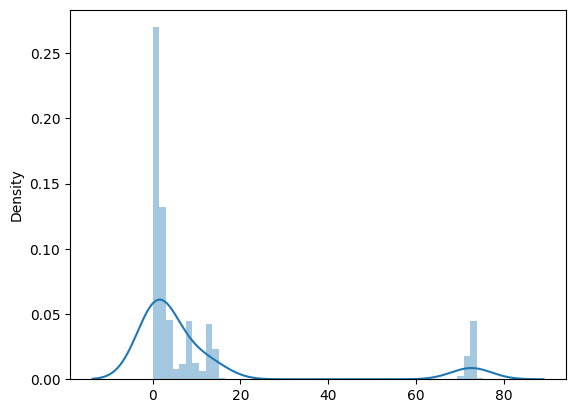

In [99]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.distplot(Data)

<Axes: >

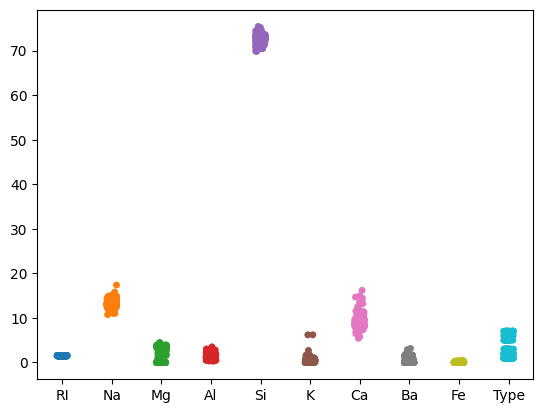

In [100]:
sns.stripplot(Data)

In [101]:
x=Data.iloc[:,:9]
y=Data.iloc[:,9]

In [102]:
x,y

(          RI     Na    Mg    Al     Si     K    Ca    Ba   Fe
 0    1.52101  13.64  4.49  1.10  71.78  0.06  8.75  0.00  0.0
 1    1.51761  13.89  3.60  1.36  72.73  0.48  7.83  0.00  0.0
 2    1.51618  13.53  3.55  1.54  72.99  0.39  7.78  0.00  0.0
 3    1.51766  13.21  3.69  1.29  72.61  0.57  8.22  0.00  0.0
 4    1.51742  13.27  3.62  1.24  73.08  0.55  8.07  0.00  0.0
 ..       ...    ...   ...   ...    ...   ...   ...   ...  ...
 209  1.51623  14.14  0.00  2.88  72.61  0.08  9.18  1.06  0.0
 210  1.51685  14.92  0.00  1.99  73.06  0.00  8.40  1.59  0.0
 211  1.52065  14.36  0.00  2.02  73.42  0.00  8.44  1.64  0.0
 212  1.51651  14.38  0.00  1.94  73.61  0.00  8.48  1.57  0.0
 213  1.51711  14.23  0.00  2.08  73.36  0.00  8.62  1.67  0.0
 
 [214 rows x 9 columns],
 0      1
 1      1
 2      1
 3      1
 4      1
       ..
 209    7
 210    7
 211    7
 212    7
 213    7
 Name: Type, Length: 214, dtype: int64)

In [103]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=11)

In [104]:

scaler=MinMaxScaler()
x_train_scaled=scaler.fit_transform(x_train)
x_test_scaled=scaler.transform(x_test)

In [105]:
x_train_scaled

array([[0.22563652, 0.29774436, 0.83668342, ..., 0.26115242, 0.        ,
        0.        ],
       [0.22651449, 0.3924812 , 0.89698492, ..., 0.22862454, 0.        ,
        0.        ],
       [0.19929763, 0.37744361, 0.87688442, ..., 0.24163569, 0.        ,
        0.        ],
       ...,
       [0.20939421, 0.32030075, 0.88442211, ..., 0.23605948, 0.        ,
        0.        ],
       [0.21378402, 0.61954887, 0.        , ..., 0.30947955, 0.2031746 ,
        0.25714286],
       [0.21729587, 0.40451128, 0.85427136, ..., 0.26858736, 0.        ,
        0.        ]])

In [106]:
x_train_scaled.shape

(149, 9)

In [107]:
x_test_scaled

array([[0.46619842, 0.45413534, 0.25376884, 0.33333333, 0.425     ,
        0.0531401 , 0.53066914, 0.        , 0.        ],
       [0.31738367, 0.53984962, 0.81909548, 0.60124611, 0.25714286,
        0.23510467, 0.03345725, 0.51746032, 0.        ],
       [0.52019315, 0.38796992, 0.89949749, 0.16510903, 0.38928571,
        0.01932367, 0.44052045, 0.        , 0.08571429],
       [0.46356453, 0.12481203, 0.47236181, 0.39563863, 0.54464286,
        0.07568438, 0.55576208, 0.        , 0.        ],
       [0.31343284, 0.56090226, 0.56281407, 0.41433022, 0.45892857,
        0.        , 0.35594796, 0.        , 0.        ],
       [0.29894644, 0.41654135, 0.84422111, 0.41744548, 0.38035714,
        0.09178744, 0.31412639, 0.        , 0.25714286],
       [0.4881475 , 0.51729323, 0.95728643, 0.15264798, 0.275     ,
        0.        , 0.39591078, 0.        , 0.        ],
       [0.28007024, 0.27669173, 0.8718593 , 0.33956386, 0.63928571,
        0.09661836, 0.28996283, 0.        , 0.17142857],


In [108]:
x_test_scaled.shape

(65, 9)

In [109]:
y_test.shape

(65,)

In [110]:
y_train.shape

(149,)

#MODEL

In [111]:
model=KNeighborsClassifier(n_neighbors=4)
model.fit(x_train_scaled,y_train)

KNeighborsClassifier(n_neighbors=4)

In [112]:
pred=model.predict(x_test_scaled)

In [113]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           1       0.66      0.78      0.71        27
           2       0.38      0.40      0.39        15
           3       0.00      0.00      0.00         6
           5       0.00      0.00      0.00         8
           6       0.25      0.67      0.36         3
           7       0.71      0.83      0.77         6

    accuracy                           0.52        65
   macro avg       0.33      0.45      0.37        65
weighted avg       0.44      0.52      0.47        65

